In [83]:
import os
import sys
import seaborn as sns
from statsforecast import StatsForecast
from statsforecast.models import Holt, ARIMA # Possible source of errors
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
from statsmodels.tsa.arima_model import ARIMA # Possible source of errors

import datetime as dt
import pycountry
import country_converter as coco

In [84]:
rn_con_col_names = ['Country','Code','Year','Other','Solar','Wind','Hydro']
rn_cap_col_names = ['Country','Code','Year','Wind','Hydro','Solar','Other']
# Import Data for Energy Production and Consumption
rn_con = pd.read_csv('modern-renewable-energy-consumption.csv',
                     header=0,
                     names=rn_con_col_names)
rn_cap = pd.read_csv('modern-renewable-prod.csv',
                     header=0,
                     names=rn_cap_col_names)

In [85]:
rn_con.head()

,Country,Code,Year,Other,Solar,Wind,Hydro
0,Africa,NaN,1971,0.164,0.0,0.0,26.013390
1,Africa,NaN,1972,0.165,0.0,0.0,29.633196
2,Africa,NaN,1973,0.170,0.0,0.0,31.345707
3,Africa,NaN,1974,0.175,0.0,0.0,35.667076
4,Africa,NaN,1975,0.172,0.0,0.0,37.717968


In [86]:
rn_cap.head()

,Country,Code,Year,Wind,Hydro,Solar,Other
0,ASEAN (Ember),NaN,2000,0.0,50.37,0.0,22.53
1,ASEAN (Ember),NaN,2001,0.0,54.26,0.0,22.42
2,ASEAN (Ember),NaN,2002,0.0,53.32,0.0,22.67
3,ASEAN (Ember),NaN,2003,0.0,53.28,0.0,22.43
4,ASEAN (Ember),NaN,2004,0.0,52.88,0.0,24.14


In [87]:
rn_con.info()
rn_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695 entries, 0 to 5694
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  5695 non-null   object 
 1   Code     4361 non-null   object 
 2   Year     5695 non-null   int64  
 3   Other    4978 non-null   float64
 4   Solar    4683 non-null   float64
 5   Wind     4744 non-null   float64
 6   Hydro    5479 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 311.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8957 entries, 0 to 8956
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  8957 non-null   object 
 1   Code     7349 non-null   object 
 2   Year     8957 non-null   int64  
 3   Wind     7996 non-null   float64
 4   Hydro    8884 non-null   float64
 5   Solar    7956 non-null   float64
 6   Other    8164 non-null   float64
dtypes: float64(4), int64(1), object(2)


In [88]:
coco_converter = coco.CountryConverter()

In [89]:
rn_con['Continent'] = rn_con['Code'].fillna('').astype(str).apply(lambda x: coco_converter.convert(names=x, to='continent'))

rn_cap['Continent'] = rn_cap['Code'].fillna('').astype(str).apply(lambda x: coco_converter.convert(names=x, to='continent'))

 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex


 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex


 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex


OWID_USS not found in regex
OWID_USS not found in regex
OWID_USS not found in regex
OWID_USS not found in regex
OWID_USS not found in regex
OWID_USS not found in regex
OWID_USS not found in regex
OWID_USS not found in regex
OWID_USS not found in regex
OWID_USS not found in regex
OWID_USS not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found i

 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex


 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex


 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex


 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex


In [90]:
# Calculate total energy consumption for each country
rn_con['Total_Consumption'] = rn_con[['Hydro', 'Wind', 'Solar', 'Other']].sum(axis=1)
# Calculate total energy production for each country
rn_cap['Total_Production'] = rn_cap[['Hydro', 'Wind', 'Solar', 'Other']].sum(axis=1)

In [91]:
# Merge the consumption and production datasets
rn_combined = pd.merge(rn_con, rn_cap, on=['Country', 'Year'])

In [92]:
# Filter the data to remove the continents in the country column 
rn_combined_2 = rn_combined[rn_combined['Continent_x'] != 'not found']

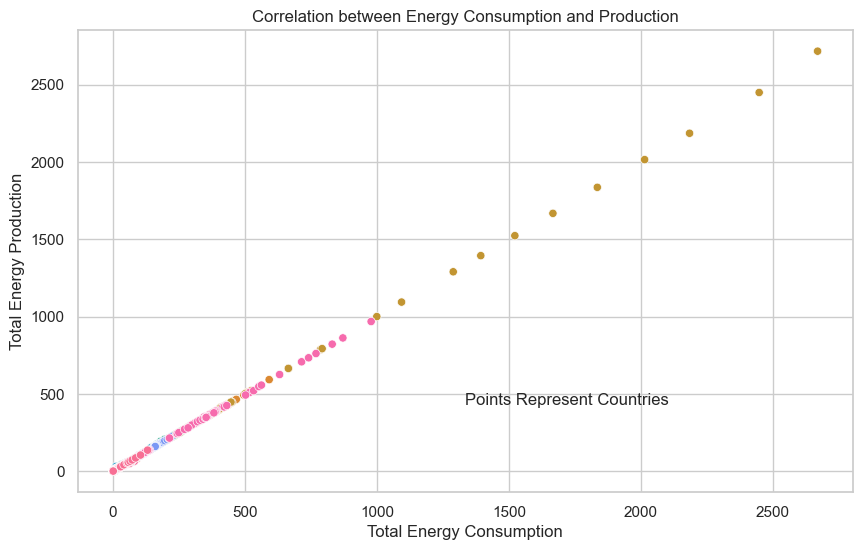

In [93]:
# Create a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Consumption', y='Total_Production', data=rn_combined_2, hue='Country',legend=False)
plt.title('Correlation between Energy Consumption and Production')
plt.xlabel('Total Energy Consumption')
plt.ylabel('Total Energy Production')
plt.text(0.5, 0.2, 'Points Represent Countries', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('ProdConsCorr.jpg')

In [94]:
#Given the correlation between the two data set we will continue with the energy production dataset as it has more dataabs

In [95]:
#Create a dataset for Asia & Oceania
rn_cap_asia = rn_cap[rn_cap['Continent'] == 'Asia']
rn_cap_oceania = rn_cap[rn_cap['Continent'] == 'Oceania']

rn_cap_asia.fillna(0, inplace=True)
rn_cap_oceania.fillna(0, inplace=True)

/var/folders/lc/9ls3_l012tn__lvnd8t13nhh0000gn/T/ipykernel_37036/3581651623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn_cap_asia.fillna(0, inplace=True)
/var/folders/lc/9ls3_l012tn__lvnd8t13nhh0000gn/T/ipykernel_37036/3581651623.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn_cap_oceania.fillna(0, inplace=True)


In [100]:
energy_sources = ['Wind', 'Hydro', 'Solar', 'Other']

# Calculate the percentage of total for each energy source
for source in energy_sources:
    rn_cap_asia[f'{source}_Percentage'] = (rn_cap_asia[source] / rn_cap_asia['Total_Production']) * 100

# Calculate the percentage of total for each energy source
for source in energy_sources:
    rn_cap_oceania[f'{source}_Percentage'] = (rn_cap_oceania[source] / rn_cap_oceania['Total_Production']) * 100
    

/var/folders/lc/9ls3_l012tn__lvnd8t13nhh0000gn/T/ipykernel_37036/2375713385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn_cap_asia[f'{source}_Percentage'] = (rn_cap_asia[source] / rn_cap_asia['Total_Production']) * 100
/var/folders/lc/9ls3_l012tn__lvnd8t13nhh0000gn/T/ipykernel_37036/2375713385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn_cap_asia[f'{source}_Percentage'] = (rn_cap_asia[source] / rn_cap_asia['Total_Production']) * 100
/var/folders/lc/9ls3_l012tn__lvnd8t13nhh0000gn/T/ipykern

In [101]:
rn_cap_asia.head()

,Country,Code,Year,Wind,Hydro,Solar,Other,Continent,Total_Production,Wind_Percentage,Hydro_Percentage,Solar_Percentage,Other_Percentage
23,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0,Asia,0.31,0.0,100.0,0.0,0.0
24,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0,Asia,0.50,0.0,100.0,0.0,0.0
25,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0,Asia,0.56,0.0,100.0,0.0,0.0
26,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0,Asia,0.63,0.0,100.0,0.0,0.0
27,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0,Asia,0.56,0.0,100.0,0.0,0.0


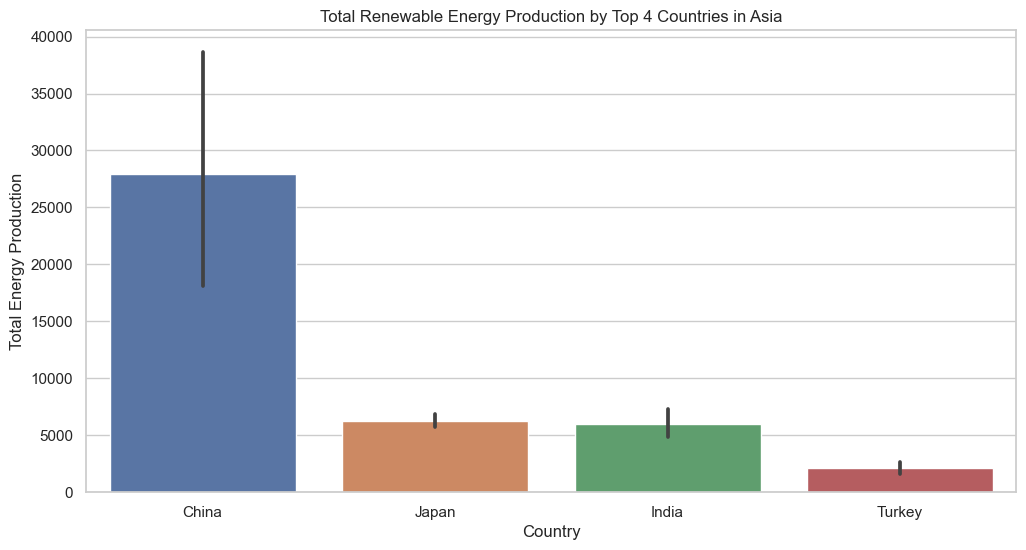

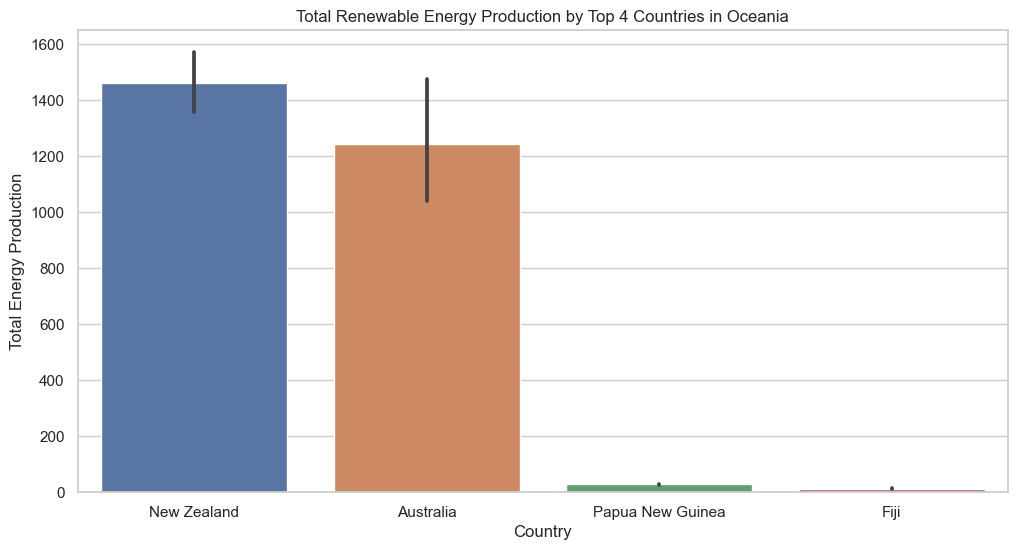

In [102]:
# Find the top 4 countries in each region based on total energy production
top_countries_asia = rn_cap_asia.groupby('Country')['Total_Production'].sum().sort_values(ascending=False).head(4).index
top_countries_oceania = rn_cap_oceania.groupby('Country')['Total_Production'].sum().sort_values(ascending=False).head(4).index

# Filter the DataFrame for the top countries
rn_cap_asia_top = rn_cap_asia[rn_cap_asia['Country'].isin(top_countries_asia)]
rn_cap_oceania_top = rn_cap_oceania[rn_cap_oceania['Country'].isin(top_countries_oceania)]

# Create a bar plots
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total_Production', data=rn_cap_asia_top, estimator=sum, order=top_countries_asia)
plt.title('Total Renewable Energy Production by Top 4 Countries in Asia')
plt.xlabel('Country')
plt.savefig('TotalProdAsia.jpg')
plt.ylabel('Total Energy Production')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total_Production', data=rn_cap_oceania_top, estimator=sum, order=top_countries_oceania)
plt.title('Total Renewable Energy Production by Top 4 Countries in Oceania')
plt.xlabel('Country')
plt.savefig('TotalProdOceania.jpg')
plt.ylabel('Total Energy Production')
plt.show()

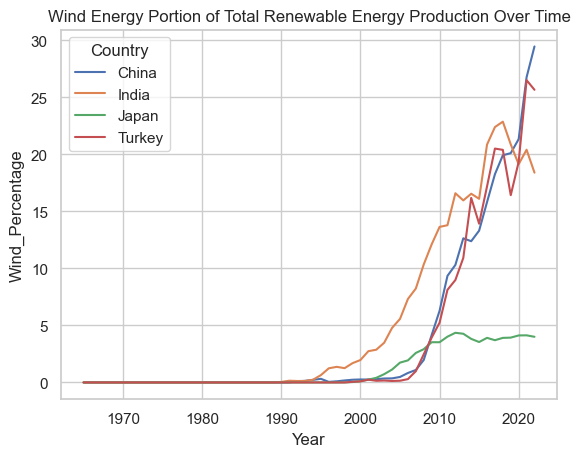

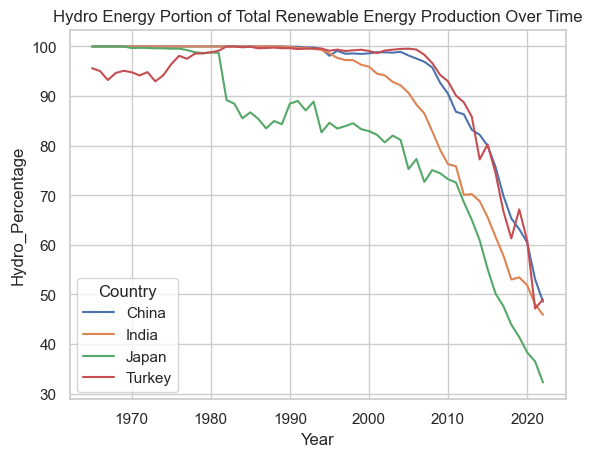

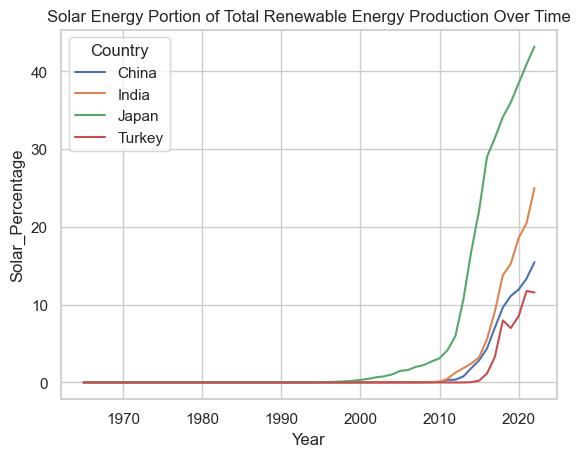

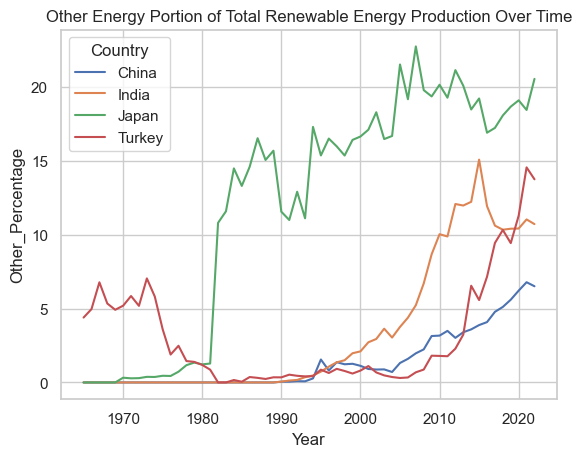

In [103]:
sns.lineplot(x='Year', y='Wind_Percentage', hue='Country', data=rn_cap_asia_top)
plt.title('Wind Energy Portion of Total Renewable Energy Production Over Time')
plt.xlabel('Year')
plt.ylabel('Wind_Percentage')
plt.savefig('wind_energy_plot.jpg')
plt.show()

sns.lineplot(x='Year', y='Hydro_Percentage', hue='Country', data=rn_cap_asia_top)
plt.title('Hydro Energy Portion of Total Renewable Energy Production Over Time')
plt.xlabel('Year')
plt.ylabel('Hydro_Percentage')
plt.savefig('hydro_energy_plot.jpg')
plt.show()

sns.lineplot(x='Year', y='Solar_Percentage', hue='Country', data=rn_cap_asia_top)
plt.title('Solar Energy Portion of Total Renewable Energy Production Over Time')
plt.xlabel('Year')
plt.ylabel('Solar_Percentage')
plt.savefig('solar_energy_plot.jpg')
plt.show()

sns.lineplot(x='Year', y='Other_Percentage', hue='Country', data=rn_cap_asia_top)
plt.title('Other Energy Portion of Total Renewable Energy Production Over Time')
plt.xlabel('Year')
plt.savefig('other_energy_plot.jpg')
plt.ylabel('Other_Percentage')
plt.show()

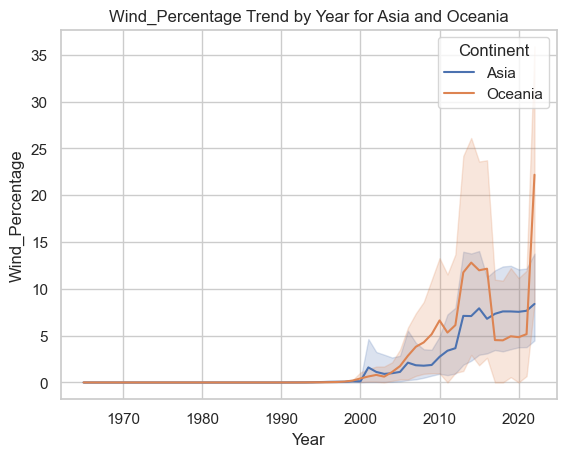

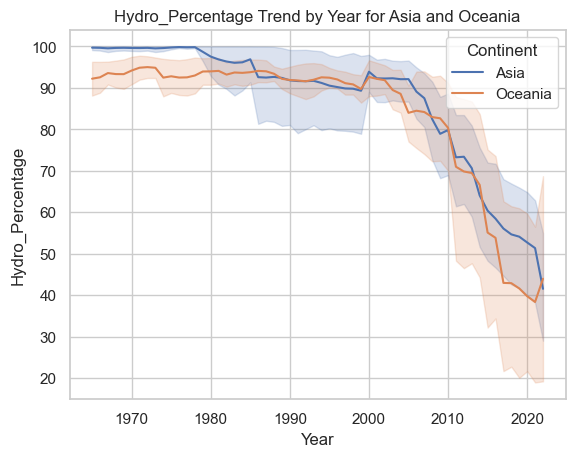

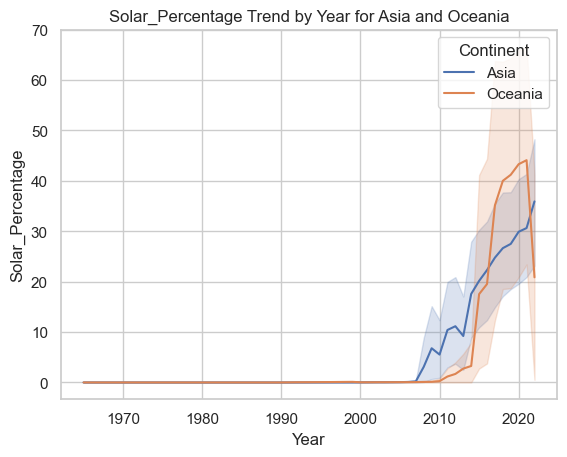

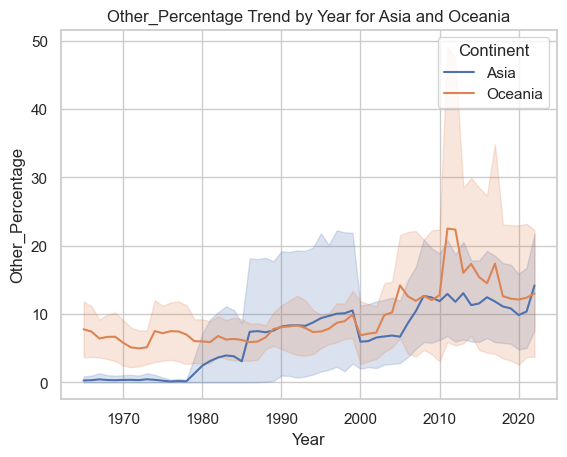

In [104]:
# Concatenate the two dataframes
rn_cap_ao_combined = pd.concat([rn_cap_asia, rn_cap_oceania])

# List of percentage columns to plot
percentage_columns = ['Wind_Percentage', 'Hydro_Percentage', 'Solar_Percentage', 'Other_Percentage']

# Create individual line plots for each percentage type
for percentage_column in percentage_columns:
    
    sns.lineplot(x='Year', y=percentage_column, hue='Continent', data=rn_cap_ao_combined)
    plt.title(f'{percentage_column} Trend by Year for Asia and Oceania')
    plt.xlabel('Year')
    plt.savefig(f'{percentage_column}_energy_plot.jpg')
    plt.ylabel(percentage_column)
    plt.show()